In [1]:
import pandas as pd
#import numpy as np

import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"


In [3]:
# read file

pima_df = pd.read_csv("pima_diabetes.csv")

In [4]:
pima_df.head(10)

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
pima_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
Skin     768 non-null int64
Test     768 non-null int64
Mass     768 non-null float64
Pedi     768 non-null float64
Age      768 non-null int64
Class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Lets analysze the distribution of the various attributes
pima_df.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values

pima_df['Class'].value_counts()
pima_df['Class1'] = pima_df['Class']
# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

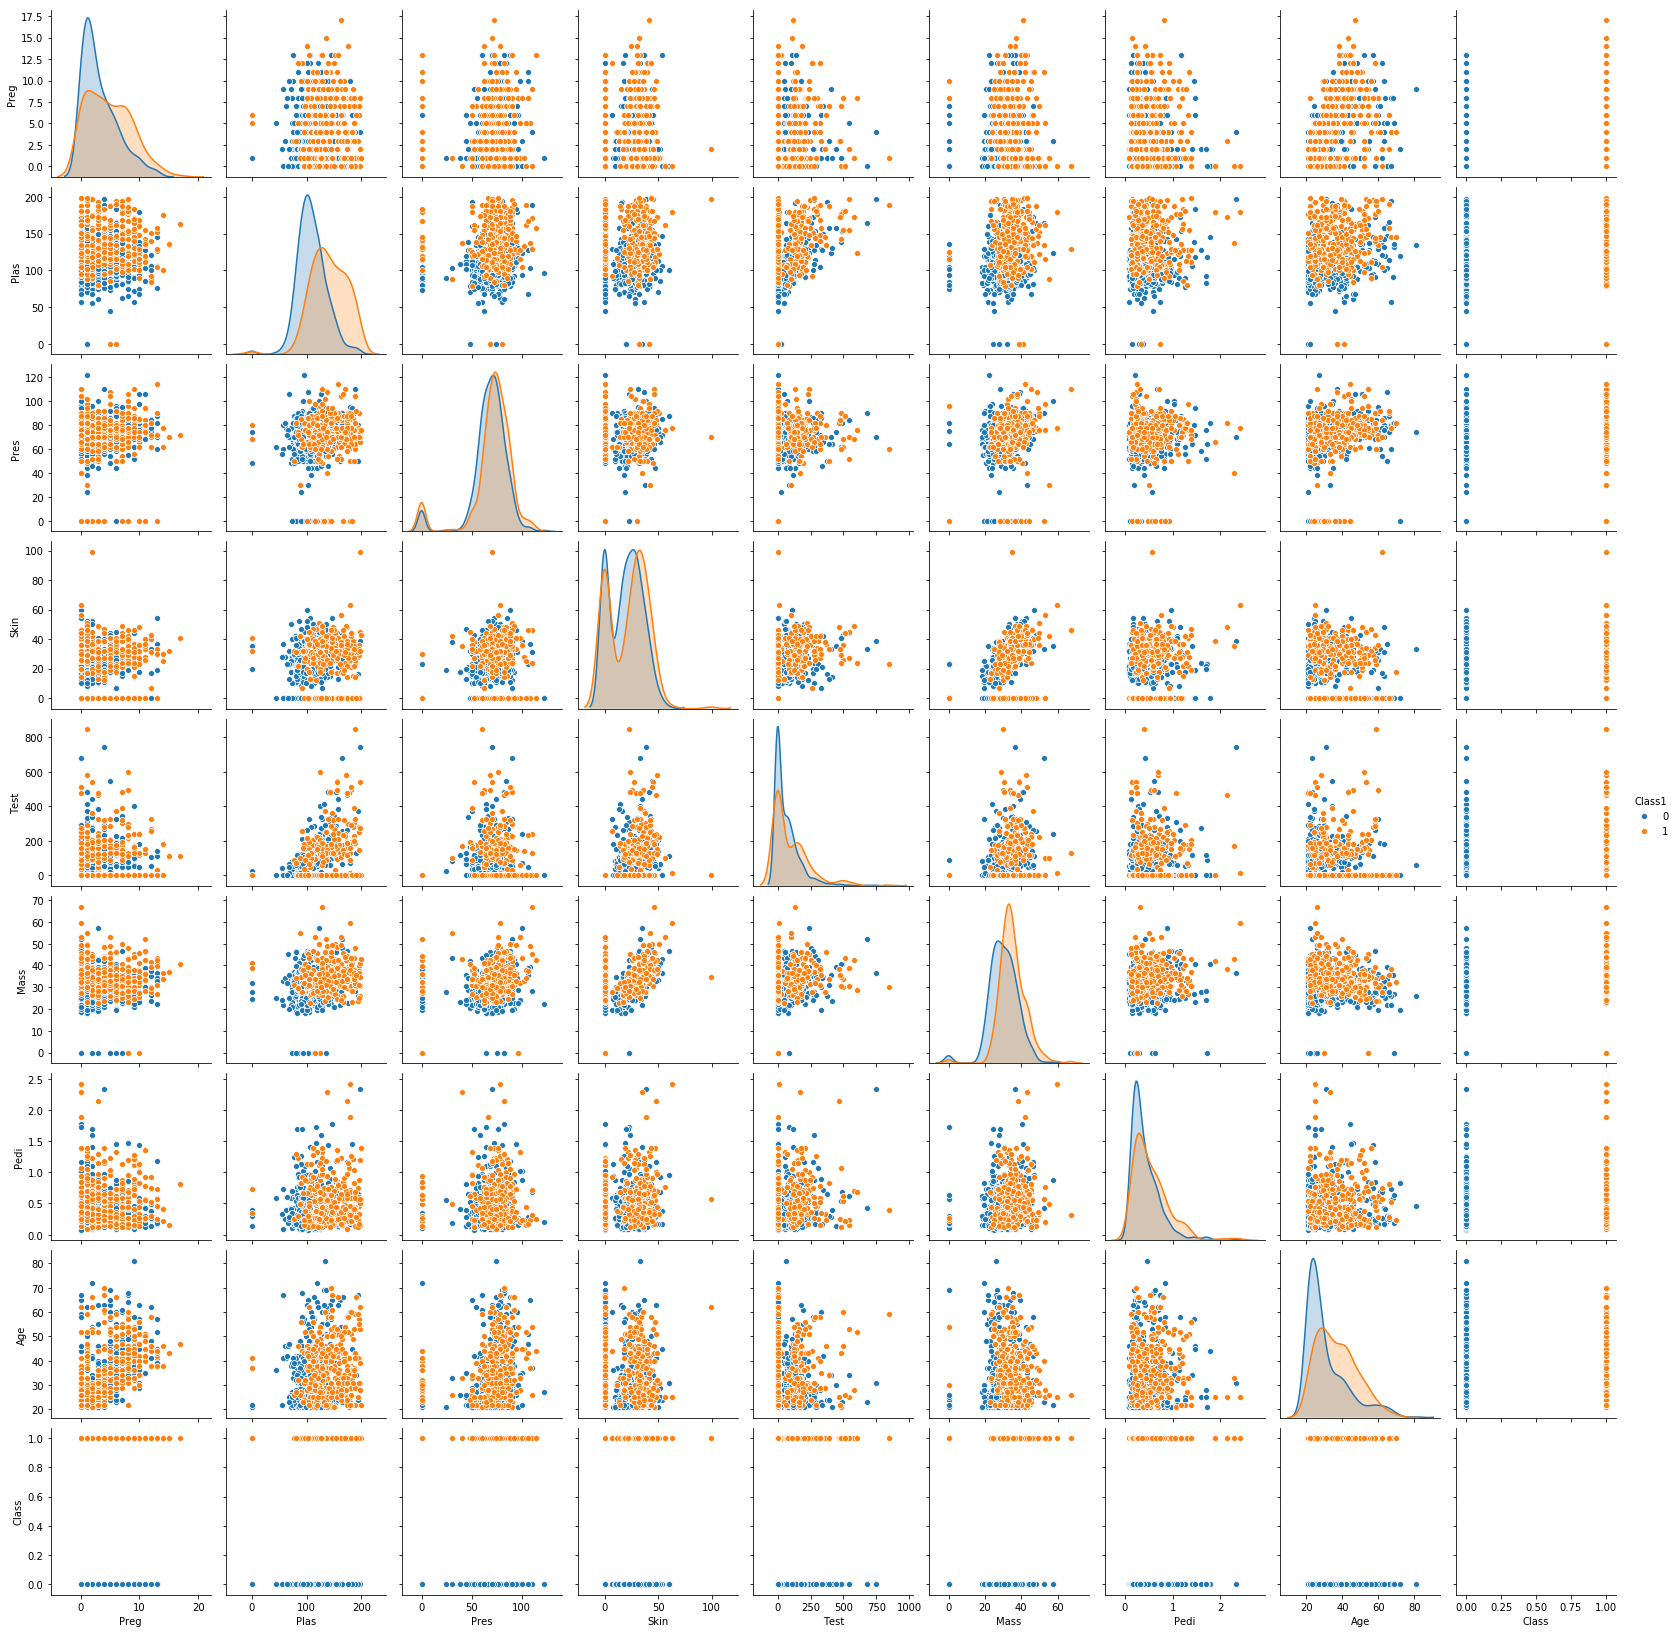

In [20]:
# Pairplot using sns

#sns.pairplot(pima_df, hue='Class', diag_kind="kde")
sns.pairplot(pima_df, diag_kind="kde", hue = "Class1")

In [9]:
X = pima_df.drop(["Class"], axis=1)

In [10]:
y = pima_df[["Class"]]

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
#print(X_train.head())
#print(y_train.head())

In [23]:
from sklearn.linear_model import LogisticRegression

# Fit the model 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_predict = model.predict(X_test)

In [25]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7821229050279329
0.7445887445887446
[[128  16]
 [ 43  44]]


In [26]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       144
           1       0.73      0.51      0.60        87

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231

